In [133]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os
import scipy.stats as stats
from scipy.special import logsumexp

__talk about beginners game__ We are after the posterior probability $P(\mu|\vec{x},\sigma)$. Using Baye's rule, we can rewrite this as $\frac{P(\vec{x}|\mu,\sigma)P(\mu|\sigma)}{P(\vec{x}|\sigma)}$. Because $\mu$ and $\sigma$ are independent, we can drop some of the conditioning and re-write this as $\frac{P(\vec{x}|\mu,\sigma)P(\mu)}{P(\vec{x}|\sigma)}$. Lastly, we can solve for $P(\vec{x}|\sigma)$ using the law of total probability which gives $\frac{P(\vec{x}|\mu,\sigma)P(\mu)}{\sum_{\mu}P(\vec{x}|\mu,\sigma)P(\mu)} = \frac{P(\vec{x}|\mu,\sigma)}{\sum_{\mu}P(\vec{x}|\mu,\sigma)}$ (the $P(\mu)$ terms cancel since $\mu$ has a uniform probability and can thus be pulled out of the sum in the denominator).

In [212]:
def get_samples(n):
    """Runs the student-game.py program for the number of samples given by n and returns the mean and
    standard deviation of the distribution, as well as a list of the sampled values"""
    command = "./student-game.py " + str(n)
    r = os.popen(command) 
    output = r.readlines() 
    
    sigma = 0
    mu = 0
    samples = []
    
    for line_num, line in enumerate(output): 
        line = line.strip('\r\n')
        if line_num == 8:
            line = line.split(" ");
            mu = float(line[4].strip(","))
            sigma = float(line[-1])
        elif 11 <= line_num <= 11+(n-1):
            samples.append(float(line.strip()))
            
    return mu, sigma, samples

def get_beginner_post_probs(x_vec, sigma, mu_vec):
    """Calculates the posterior probability of mu given x_vec and sigma for each of the mu values given in 
    mu_vec"""
    prob_list = []
    for mu in mu_arr:
        prob_list.append(sum([stats.norm.logpdf(x,mu,sigma) for x in x_vec]))
    
    prob_sum = logsumexp(prob_list)
    post_probs_list = np.exp([prob-prob_sum for prob in prob_list])
    
    best_mu_prob = max(post_probs_list)
    best_mu = mu_vec[list(post_probs_list).index(best_mu_prob)]
    
    return best_mu, best_mu_prob, post_probs_list
            
def get_beginner_pub_probs(x_vec, sigma, mu_vec):
    """Given a vector of sample values, sigma, and a vector of mu values, calculates the pub's given
    probability for each value of mu in mu_vec"""
    mean_est = np.mean(x_vec)
    n = len(x_vec)
    prob_vec = [stats.norm.logpdf(mu, mean_est, sigma/np.sqrt(n)) for mu in mu_vec]
    total_prob = logsumexp(prob_vec)
    pub_probs_list = np.exp([prob-total_prob for prob in prob_vec])
    
    return pub_probs_list

def play_beginners_game(N, n, mu_arr):
    true_mu_list = []
    true_sigma_list = []
    samples_list = []
    post_probs_list = []
    pub_probs_list = []
    
    for iteration in range(N):
        true_mu, true_sigma, samples = get_samples(n)
        true_mu_list.append(true_mu)
        true_sigma_list.append(true_sigma)
        samples_list.append(samples)
        
        vals = get_beginner_post_probs(samples, sigma, mu_arr)
        post_probs_list.append(vals[2])
        
        vals = get_beginner_pub_probs(samples, sigma, mu_arr)
        pub_probs_list.append(vals)
        
    
    #TODO add in a vertical line for the true mean and a horizontal line for the true s.d.
    fig, axs = plt.subplots(N, figsize=(6,2*N))
    if N != 1:
        for plt_idx, ax in enumerate(axs):
            ax.semilogy(mu_arr, post_probs_list[plt_idx], color="r", alpha=0.5)
            ax.semilogy(mu_arr, pub_probs_list[plt_idx], color="b", alpha=0.5)
            ax.label_outer()
    # This is an edge case for when N = 1, in which case the axs object is not iterable
    elif N == 1:
        axs.semilogy(mu_arr, post_probs_list[0], color="r", alpha=0.5)
        axs.semilogy(mu_arr, pub_probs_list[0], color="b", alpha=0.5)
        axs.label_outer()
    
    fig.suptitle("Probability Estimate Curves for $P(\mu|\sigma)$\n(multiple games)")
    fig.legend(["Bayesian","Pub"]) 
    fig.text(0.5, 0.04, "$\mu$", ha="center", fontsize=12)
    fig.text(0.04, 0.5, "Probability", va="center", ha="right", rotation="vertical", fontsize=12)
    return None

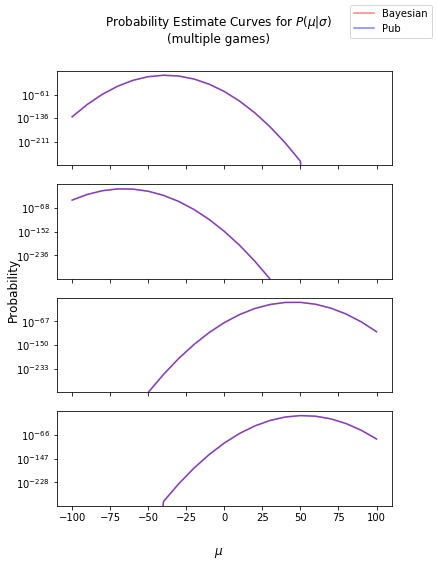

In [213]:

mu_arr = np.arange(-100,110,10)
sigma_arr = np.arange(5,105,5)
play_beginners_game(4,4,mu_arr)

In [99]:
def get_advanced_post_probs(x_vec, sigma_vec, mu_vec):
    

-100.0